<a href="https://colab.research.google.com/github/AmonPlayer/gaming-behavior/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
#I dont see any issues with the data. It looks clean to me.
df = pd.read_csv('online_gaming_behavior_dataset.csv')
df.head()
df.info()
for col in df.columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    print(df['PlayTimeHours'].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [35]:
df_filtered = df[df['PlayTimeHours'] >= 1]

Filters out any play time hours that were under an hour to make my data more readible.

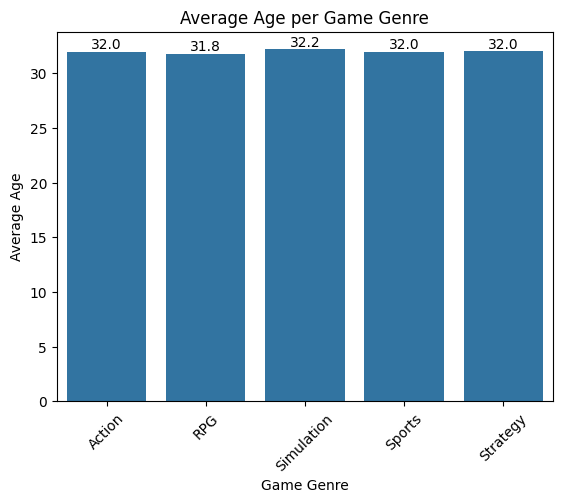

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
avg_age = df.groupby('GameGenre', as_index=False)['Age'].mean()

ax = sns.barplot(data=avg_age, x='GameGenre', y='Age')
plt.title('Average Age per Game Genre')
plt.xlabel('Game Genre')
plt.ylabel('Average Age')
plt.xticks(rotation=45)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')  # show one decimal place

plt.show()


looks like the average age for games is about the same with simulation games being slightly favored by older people.

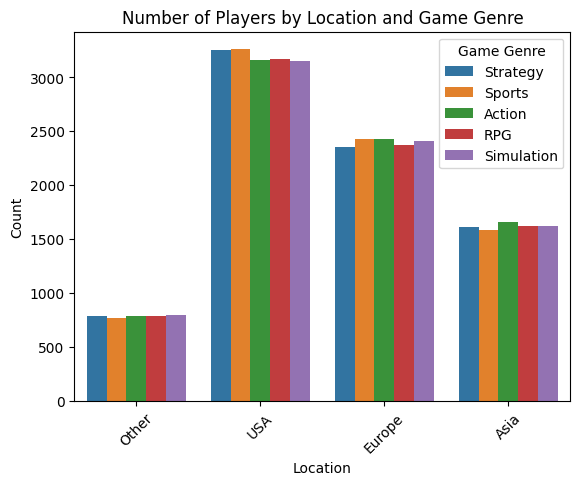

In [26]:


# Count players per Location and GameGenre
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Location', hue='GameGenre')
plt.title('Number of Players by Location and Game Genre')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Game Genre')
plt.show()



This shows that the USA has the the largest gaming community and that sport games are the most played.

/tmp/ipython-input-1708118067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


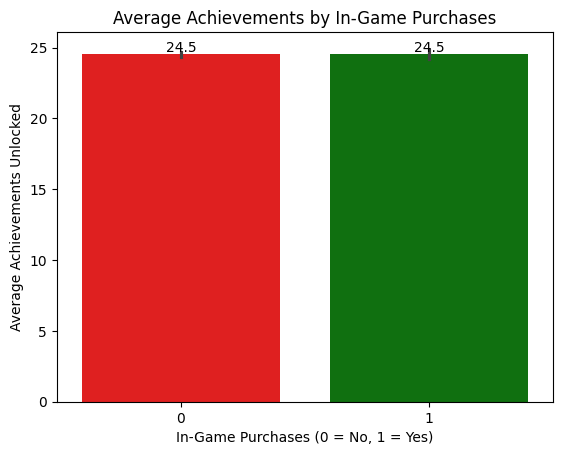

In [27]:
ax = sns.barplot(
    data=df,
    x='InGamePurchases',
    y='AchievementsUnlocked',
    palette=['red','green']
)

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')  # show 1 decimal place

plt.title('Average Achievements by In-Game Purchases')
plt.xlabel('In-Game Purchases (0 = No, 1 = Yes)')
plt.ylabel('Average Achievements Unlocked')
plt.show()

There seems to be no relationship between achievements count and money spent on the game.

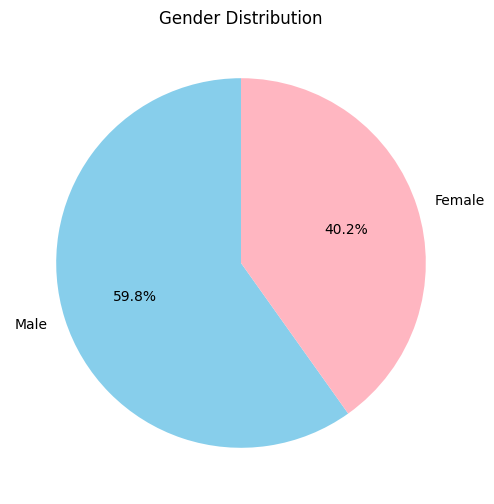

In [28]:

# Count the number of each gender
gender_counts = df['Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',  # show percentages
    startangle=90,
    colors=['skyblue', 'lightpink']  # optional: customize colors
)
plt.title('Gender Distribution')
plt.show()


This shows a higher Male distribution across gamers.

Knowing how many hours a player has played does not help predict how many achievements he has unlocked

In [33]:
bins = [0, 10, 20, 50, 100, 200]
df['HoursBin'] = pd.cut(df_filtered['PlayTimeHours'], bins)
summary = df.groupby('HoursBin')['AchievementsUnlocked'].agg(['mean', 'median', 'count'])
print(summary)


                 mean  median  count
HoursBin                            
(0, 10]     24.436378    24.0  15042
(10, 20]    24.593724    25.0  16698
(20, 50]    24.517932    24.0   6636
(50, 100]         NaN     NaN      0
(100, 200]        NaN     NaN      0


/tmp/ipython-input-2831172269.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('HoursBin')['AchievementsUnlocked'].agg(['mean', 'median', 'count'])


This shows that there is no clear trend with achievements and hours played. Playing more does not necessarily mean more achievements